In [1]:
import pandas as pd

In [2]:
from text_processing import Preprocessor, Vectorizer, SentimentAnalyzer, KeywordExtractor

In [3]:
import psycopg2

conn = psycopg2.connect("dbname=azs user=postgres password=f8ysz789")
cur = conn.cursor()

df = pd.read_sql_query("SELECT * FROM testing.azs_review order by object_id", conn)

cur.close()
conn.close()

C:\Users\an23m\AppData\Local\Temp\ipykernel_5372\2666594234.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM testing.azs_review order by object_id", conn)


### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [4]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
words_to_remove = {'–Ω–µ', '–≤—Å–µ–≥–¥–∞', '–ª—É—á—à–µ', '–Ω–∏–∫–æ–≥–¥–∞', '—Ö–æ—Ä–æ—à–æ', '–Ω–µ—Ç', '–Ω–µ–ª—å–∑—è', '–º–æ–∂–Ω–æ'}
for word in words_to_remove:
    stop_words.discard(word)

abbreviations = {
    "—Ö–∑": "–Ω–µ –∑–Ω–∞—é",
    "–Ω–µ–∑–Ω": "–Ω–µ –∑–Ω–∞—é",
    "—â–∞—Å": "—Å–µ–π—á–∞—Å",
    "—á—ë": "—á—Ç–æ",
    "—Å–ø—Å": "—Å–ø–∞—Å–∏–±–æ",
    "—â–∞—Å": "—Å–µ–π—á–∞—Å",
    "—á–æ—Ç": "—á—Ç–æ-—Ç–æ",
    "–ø–∂": "–ø–æ–∂–∞–ª—É–π—Å—Ç–∞",
    "–Ω–æ—Ä–º": "–Ω–æ—Ä–º–∞–ª—å–Ω–æ",
    "–∫—Å—Ç": "–∫—Å—Ç–∞—Ç–∏",
    "–º–±": "–º–æ–∂–µ—Ç –±—ã—Ç—å",
    "—Ç–∫": "—Ç–∞–∫ –∫–∞–∫",
    "–≤—Å–º": "–≤ —Å–º—ã—Å–ª–µ",
    "—á–µ–ª": "—á–µ–ª–æ–≤–µ–∫",
    "–±–ª–∏–Ω": "—É–∂–∞—Å",
    "–ø–ª–∑": "–ø–æ–∂–∞–ª—É–π—Å—Ç–∞"
}

In [5]:
preprocessor = Preprocessor(stop_words) # ,abbreviations

In [6]:
from concurrent.futures import ThreadPoolExecutor
if 'cleaned_text' not in df.columns:
        texts = df['comment_text'].tolist()  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü –≤ —Å–ø–∏—Å–æ–∫
        with ThreadPoolExecutor(max_workers=10) as executor:
            cleaned_texts = list(executor.map(preprocessor.clean_text, texts))
        df['cleaned_text'] = cleaned_texts
        print("–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ 'cleaned_text'.")

KeyboardInterrupt: 

### –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è

In [7]:
tokenized_rev = pd.read_csv("all_preprocessed.csv")

In [8]:
tokenized_rev

object_id comment_type             comment_time  \
0         1004394051  /ugc/review  2024-08-21 08:40:36.511   
1         1004394051  /ugc/review  2024-08-26 09:14:35.621   
2         1004394051  /ugc/review  2024-08-29 12:01:41.872   
3         1004394051  /ugc/review  2024-09-02 20:16:11.641   
4         1004394051  /ugc/review  2016-05-24 23:08:56.000   
...              ...          ...                      ...   
168849  245596964645  /ugc/review  2019-10-19 20:08:37.754   
168850  245596964645  /ugc/review  2019-10-20 13:57:04.892   
168851  245596964645  /ugc/review  2019-10-20 17:18:36.411   
168852  245596964645  /ugc/review  2019-10-22 13:08:08.705   
168853  245596964645  /ugc/review  2019-10-22 21:34:55.447   

                         author_id  profession_level_num  rating  \
0       6463yeagmbaugdkbp9y9ak6ckg                     3     5.0   
1       2zhrztyn3j9apk485nktey9e80                    14     4.0   
2       5p4zc3y74pk9ffcx7p071qtyf0                     7     5.0   
3       0n0nz7jbj3tmnjj40q1bhv8cqg                     6     5.0   
4       twzk2t9fk82w6pv5jcygmc6w84                     8     1.0   
...                            ...                   ...     ...   
168849  vwgntqaxahaz9y9khh7z81ux98                    27     5.0   
168850  z1ux877fph2qaj03gvmjmhjba4                    12     2.0   
168851  2je1h7qahnunwh9uz4kr8dpqwg                    16     4.0   
168852  y3k11xa99n2yjpuq7y82w856t8                    12     5.0   
168853  373k4bv60kq1rrd3ww95v7jv9g                     7     5.0   

                                             comment_text  likes_num  \
0       –ü–ª—é—Å—ã: –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –ì–æ—Ä—è—á–∏–π –∫–æ—Ñ–µ. –ù–æ...          1   
1       –ë—ã–ª –ø–∞—Ä—É —Ä–∞–∑ –∑–∞–ø—Ä–∞–≤–∫–∞ –∫–∞–∫ –∑–∞–ø—Ä–∞–≤–∫–∞ —Ç–æ–ª—å–∫–æ –Ω–µ –≤...          0   
2       –í—Å–µ–≥–¥–∞ —Ö–æ—Ä–æ—à–∏–µ –∏ –≤–µ—Å–µ–ª—ã–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏. –í–∫—É—Å–Ω—ã–µ —Ö...          0   
3                                –°–∞–º–∞—è –ª—é–±–∏–º–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞.           2   
4                                          –ù–µ—Ç –¥–∏–∑–µ–ª—è (((          4   
...                                                   ...        ...   
168849                                  –•–æ—Ä–æ—à–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞!          4   
168850                                     –¶–µ–Ω–∞ –Ω–µ —Ä–∞–¥—É–µ—Ç          3   
168851               –¢–æ–ø–ª–∏–≤–æ,  –º–∞–≥–∞–∑–∏–Ω, —Å–µ—Ä–≤–∏—Å –Ω–∞ –≤—ã—Å–æ—Ç–µ.          6   
168852                       –°–∞–º–∞—è –ø—Ä–∏–≤–µ—Ç–ª–∏–≤–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞))          3   
168853      –∑–∞–ø—Ä–∞–≤–ª—è—é—Å—å, –ø–æ—Ç–æ–º—É —á—Ç–æ –µ—Å—Ç—å –∫–∞—Ä—Ç–∞ –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏          1   

        dislikes_num               date_of_pars  hist_file_load_id  \
0                  0  2024-09-22 19:11:48+00:00                  3   
1                  0  2024-09-22 19:11:48+00:00                  3   
2                  0  2024-09-22 19:11:48+00:00                  3   
3                  0  2024-09-22 19:11:48+00:00                  3   
4                  0  2024-09-22 19:11:48+00:00                  3   
...              ...                        ...                ...   
168849             0  2024-09-22 19:11:48+00:00                  3   
168850             2  2024-09-22 19:11:48+00:00                  3   
168851             1  2024-09-22 19:11:48+00:00                  3   
168852             1  2024-09-22 19:11:48+00:00                  3   
168853             2  2024-09-22 19:11:48+00:00                  3   

                                             cleaned_text  
0       ['–ø–ª—é—Å', '–≤–µ–∂–ª–∏–≤—ã–π', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '–≥–æ—Ä—è—á–∏–π'...  
1       ['–ø–∞—Ä–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–Ω–µ', '–≤–∏–¥–Ω–æ'...  
2       ['–≤—Å–µ–≥–¥–∞', '—Ö–æ—Ä–æ—à–∏–π', '–≤–µ—Å—ë–ª—ã–π', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', ...  
3                        ['—Å–∞–º–∞—è', '–ª—é–±–∏–º—ã–π', '–∑–∞–ø—Ä–∞–≤–∫–∞']  
4                                       ['–Ω–µ—Ç', '–¥–∏–∑–µ–ª—å']  
...  

–ó–∞–≥—Ä—É–∑–∏—Ç–µ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å Navec:

In [33]:
from navec import Navec

path = 'model\\navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [10]:
tokenized_reviews = tokenized_rev['cleaned_text']
import ast
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞–∂–¥—É—é —Å—Ç—Ä–æ–∫—É –≤ —Å–ø–∏—Å–æ–∫
tokenized_reviews = tokenized_reviews.apply(ast.literal_eval)

In [25]:
from collections import Counter

# –°–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Ç–æ–∫–µ–Ω–æ–≤ –∏–∑ –æ—Ç–∑—ã–≤–æ–≤
all_tokens = [token for review in tokenized_reviews for token in review]
# –ü–æ–¥—Å—á–µ—Ç —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏ —Å–ª–æ–≤
word_counts = Counter(all_tokens)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –≤ –º–æ–¥–µ–ª–∏ —Å–ª–æ–≤
unknown_words = {word: count for word, count in word_counts.items() if word not in navec}
# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ —Å–ª–æ–≤–∞—Ä—è –ø–æ —É–±—ã–≤–∞–Ω–∏—é –∑–Ω–∞—á–µ–Ω–∏–π
unknown_words = sorted(unknown_words.items(), key=lambda x: x[1], reverse=True)

# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame
unknown_words = pd.DataFrame(unknown_words, columns=['–°–ª–æ–≤–æ', '–ß–∞—Å—Ç–æ—Ç–∞'])
unknown_words.head(50)

–°–ª–æ–≤–æ  –ß–∞—Å—Ç–æ—Ç–∞
0                95     2740
1               100     1663
2                10     1136
3              –±–µ–Ω–∑     1123
4              —ç–∫—Ç–æ     1056
5              \n\n      947
6                92      929
7                        877
8          –±–æ–Ω—É—Å–Ω—ã–π      806
9                20      623
10         –ø–æ–¥–∫–∞—á–∫–∞      610
11      –¥–æ—Ä–æ–≥–æ–≤–∞—Ç—ã–π      583
12          –Ω–µ–¥–æ–ª–∏–≤      562
13               15      544
14               –º4      463
15       –º–∏–Ω–∏–º–∞—Ä–∫–µ—Ç      442
16               30      408
17         –æ—Å–Ω–æ–≤–Ω—ã–π      391
18              \n       369
19     –ª—É–∫–æ–π–ª–æ–≤—Å–∫–∞—è      319
20               \n      313
21               50      297
22       –∑–∞–ø—Ä–∞–≤–∫–∞–º–∏      260
23     –∑–∞–ø—Ä–∞–≤–ª—è–ª–∞—Å—å      251
24             –∞–∏95      235
25          —Ö–æ—Ç–¥–æ–≥–∏      230
26       –∑–∞–ø—Ä–∞–≤–∏—Ç—Å—è      230
27               40      229
28       –ø–æ—Å—Ç–æ–ø–ª–∞—Ç–∞      214
29               12      206
30              200      189
31             1000      180
32    –∑–∞–ø—Ä–∞–≤–ª—è–µ—à—å—Å—è      174
33       –Ω–µ–¥–æ–ª–∏–≤–∞—Ç—å      169
34               25      165
35               23      158
36          —É–±–æ—Ä–Ω—ã–π      157
37               98      153
38              500      153
39             95–≥–æ      153
40              –º11      153
41  –∞–≤—Ç–æ–∑–∞–ø—Ä–∞–≤–æ—á–Ω—ã–π      148
42              300      146
43           —á–∞–µ–≤–æ–π      145
44         –ª—É–∫–æ–π–ª–∞—Ö      143
45     –ª—É–∫–æ–π–ª–æ–≤—Å–∫–∏—Ö      143
46        –¥–æ—Ä–æ–≥–æ–≤–∞—Ç      139
47        —Å–∫–∏–¥–æ—á–Ω—ã–π      139
48           –ª—É–∫–æ–∏–ª      137
49      –∑–∞–ø—Ä–∞–≤–∏–ª–∞—Å—å      136

–î–æ–æ–±—É—á–µ–Ω–∏–µ

In [11]:
from gensim.models import Word2Vec

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
my_model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, epochs=10)

In [26]:
my_model.wv.most_similar('–±–µ–Ω–∑–∏–Ω')

[('—Ç–æ–ø–ª–∏–≤–æ', 0.7718262076377869),
 ('–±–µ–Ω–∑', 0.6882372498512268),
 ('–±–µ–Ω–∑–∞', 0.5183131098747253),
 ('–¥–∏–∑–µ–ª—å', 0.4736570417881012),
 ('–¥—Ç', 0.44416916370391846),
 ('–∫–∞–∑–∞—Ç—å—Å—è', 0.4402461349964142),
 ('–∞–∏', 0.43509605526924133),
 ('–±–µ–Ω–∑–∏–Ω–µ', 0.43040457367897034),
 ('–¥–∏–∑—Ç–æ–ø–ª–∏–≤–æ', 0.42788636684417725),
 ('–≥–æ—Ä—é—á–µ–µ', 0.41344863176345825)]

In [22]:
my_model.save("model\\my_word2vec_model_full_10.model")

In [ ]:
from gensim.models import Word2Vec

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
my_model_15 =   

In [28]:
my_model_15.wv.most_similar('–±–µ–Ω–∑–∏–Ω')

[('—Ç–æ–ø–ª–∏–≤–æ', 0.7679861783981323),
 ('–±–µ–Ω–∑', 0.6566876769065857),
 ('–±–µ–Ω–∑–∞', 0.45831117033958435),
 ('–∞–∏', 0.4389108121395111),
 ('–±–µ–Ω–∑–∏–Ω–µ', 0.4365941286087036),
 ('–¥–∏–∑–µ–ª—å', 0.4334673285484314),
 ('–¥–∏–∑—Ç–æ–ø–ª–∏–≤–æ', 0.4290488362312317),
 ('–¥—Ç', 0.4279335141181946),
 ('95–π', 0.41972482204437256),
 ('–≥–æ—Ä—é—á–µ–µ', 0.3963017165660858)]

In [30]:
my_model_15.save("model\\my_word2vec_model_16.model")

In [21]:
from gensim.models import Word2Vec

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –Ω–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
my_model_20 = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, epochs=20)

In [25]:
my_model_20.wv.most_similar('–±–µ–Ω–∑–∏–Ω')

[('—Ç–æ–ø–ª–∏–≤–æ', 0.7789238691329956),
 ('–±–µ–Ω–∑', 0.6324388384819031),
 ('–±–µ–Ω–∑–∞', 0.43328389525413513),
 ('–∞–∏', 0.41164645552635193),
 ('–±–µ–Ω–∑–∏–Ω–µ', 0.38717496395111084),
 ('92–π', 0.3803746700286865),
 ('95–π', 0.37648075819015503),
 ('92', 0.37413284182548523),
 ('–±–µ–Ω–∑–æ–º', 0.3708576560020447),
 ('–¥–∏–∑–µ–ª—å', 0.36667537689208984)]

In [29]:
my_model_20.save("model\\my_word2vec_model_20.model")

In [29]:
my_model.save("model\\my_word2vec_model.model")

In [30]:
my_model = Word2Vec.load("model\\my_word2vec_model.model")

In [31]:
my_model = Word2Vec.load("model\\my_word2vec_model_16.model")

In [34]:
from navec import Navec

path = "model\\navec_hudlit_v1_12B_500K_300d_100q.tar"
navec_model = Navec.load(path)
# –°–æ–∑–¥–∞–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è –¥–ª—è –æ–±—ä–µ–¥–∏–Ω—ë–Ω–Ω—ã—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤
combined_vectors = {}

# –î–æ–±–∞–≤—å—Ç–µ –≤–µ–∫—Ç–æ—Ä—ã –∏–∑ Navec
for word in navec_model.vocab.words:
  combined_vectors[word] = navec_model[word]
# –î–æ–±–∞–≤—å—Ç–µ –≤–µ–∫—Ç–æ—Ä—ã –∏–∑ Word2Vec
for word in my_model.wv.index_to_key:
    if word not in combined_vectors:  # –ï—Å–ª–∏ —Å–ª–æ–≤–∞ –Ω–µ—Ç –≤ Navec, –¥–æ–±–∞–≤–ª—è–µ–º –µ–≥–æ
        combined_vectors[word] = my_model.wv[word]
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤ NumPy –º–∞—Å—Å–∏–≤ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è
import numpy as np
combined_vectors_array = {word: np.array(vector) for word, vector in combined_vectors.items()}

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –≤–µ–∫—Ç–æ—Ä–æ–≤ –≤ —Ñ–∞–π–ª
np.save("model\\combined_vectors_2.npy", combined_vectors_array)

In [56]:
navec_model.get('–ø—Ä–∏–≤–µ—Ç').shape

(300,)

In [60]:
from gensim.models import KeyedVectors

# –°–æ–∑–¥–∞–µ–º –æ–±—ä–µ–∫—Ç KeyedVectors
model = KeyedVectors(vector_size=300)

# –î–æ–±–∞–≤–ª—è–µ–º –≤–µ–∫—Ç–æ—Ä—ã –≤ –º–æ–¥–µ–ª—å
model.add_vectors(list(combined_vectors_array.keys()), list(combined_vectors_array.values()))

# –¢–µ–ø–µ—Ä—å –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ—Ç–æ–¥ most_similar
similar_words = model.most_similar('–∫—Ä—É—Ç–æ', topn=30)

# –í—ã–≤–æ–¥–∏–º —Å—Ö–æ–∂–∏–µ —Å–ª–æ–≤–∞
for word, similarity in similar_words:
    print(word, similarity)

–∫—Ä—É—á–µ 0.5644432902336121
–∫—Ä—É—Ç–æ–π 0.5540239214897156
—Ä–µ–∑–∫–æ 0.5071256756782532
–≤–ø—Ä–∞–≤–æ 0.4972566068172455
–≤–ª–µ–≤–æ 0.48677876591682434
—Ä–∞–∑–≤–µ—Ä–Ω—É–≤—à–∏—Å—å 0.4747283458709717
–∫—Ä—É—Ç–∞—è 0.4433158338069916
–Ω–∞–ª–µ–≤–æ 0.4374173581600189
–∫—Ä—É—Ç—ã–µ 0.430897057056427
–ø–æ–≤–æ—Ä–∞—á–∏–≤–∞–ª–∞ 0.4261738955974579
—Å–∫–ª–æ–Ω 0.4240933656692505
–æ–±—Ä—ã–≤–∞–ª—Å—è 0.4223179519176483
–≤–≤–µ—Ä—Ö 0.42216652631759644
–ø–æ–≤–æ—Ä–∞—á–∏–≤–∞–µ—Ç 0.42015284299850464
—Ç—Ä–æ–ø–∏–Ω–∫–∞ 0.41945692896842957
–∫—Ä—É—Ç—ã–º 0.41736337542533875
–ª–∏—Ö–æ 0.4153338074684143
–≤–∏—Ä–∞–∂ 0.41358914971351624
—Ä–∞–∑–≤–µ—Ä–Ω—É–ª—Å—è 0.4120427072048187
–ø–æ–≤–æ—Ä–æ—Ç 0.41142144799232483
–ø–æ–≤–µ—Ä–Ω—É–ª 0.40957391262054443
—Ç—Ä–æ–ø–∞ 0.4086358845233917
—Å–≤–æ—Ä–∞—á–∏–≤–∞–ª–∞ 0.4077044725418091
—É—Ö–æ–¥–∏–ª–∞ 0.40502262115478516
–ø–æ–≤–µ—Ä–Ω—É–ª–∏ 0.4039589762687683
–Ω–∞–ø—Ä–∞–≤–æ 0.40217989683151245
–æ—Ç–≤–µ—Å–Ω–æ 0.40204790234565735
–∫–ª–µ–≤–æ 0.4006654918193817
–¥–æ—Ä–æ–≥–∞ 0.4001229107379

In [35]:
vectorizer = Vectorizer(combined_vectors_array)

In [ ]:
vectorizer.vectorize_text(['–ø—Ä–∏–≤–µ—Ç'])

[array([-0.14197442,  0.01595282, -0.11622857,  0.19758469, -0.54093564,
        -0.23015393,  0.2083324 ,  0.20733036, -0.46802008, -0.43609178,
        -0.12699111,  0.11630419, -0.25389975, -0.2675142 ,  0.32111672,
         0.09095071, -0.31486326, -0.23365863, -0.1914287 , -0.2472466 ,
        -0.35027468, -0.02377667, -0.49100557,  0.7579114 ,  0.43025348,
         0.33716568, -0.30256617, -0.31430617, -0.7097412 , -0.19473657,
        -0.20919581, -0.3833087 ,  0.15386088,  0.28161135,  0.09251209,
         0.15977159, -0.04214252,  0.23746091,  0.37219337,  0.07557444,
        -0.06280387, -0.32926294,  0.4910019 , -0.48998028, -0.36470553,
         0.02416045,  0.00712121,  0.07632633, -0.36364338, -0.05238971,
         0.28933373,  0.3203861 ,  0.3046747 ,  0.36945623,  0.5994971 ,
        -0.17325711, -0.31948823,  0.2167263 ,  0.7109235 ,  0.6527332 ,
         0.16617548, -0.64993405,  0.4042312 , -0.12316786,  0.37892154,
         0.24959418,  0.26957294,  0.36229745, -0.4

In [37]:
df = tokenized_rev
df.head(2)

object_id comment_type             comment_time  \
0  1004394051  /ugc/review  2024-08-21 08:40:36.511   
1  1004394051  /ugc/review  2024-08-26 09:14:35.621   

                    author_id  profession_level_num  rating  \
0  6463yeagmbaugdkbp9y9ak6ckg                     3     5.0   
1  2zhrztyn3j9apk485nktey9e80                    14     4.0   

                                        comment_text  likes_num  dislikes_num  \
0  –ü–ª—é—Å—ã: –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –ì–æ—Ä—è—á–∏–π –∫–æ—Ñ–µ. –ù–æ...          1             0   
1  –ë—ã–ª –ø–∞—Ä—É —Ä–∞–∑ –∑–∞–ø—Ä–∞–≤–∫–∞ –∫–∞–∫ –∑–∞–ø—Ä–∞–≤–∫–∞ —Ç–æ–ª—å–∫–æ –Ω–µ –≤...          0             0   

                date_of_pars  hist_file_load_id  \
0  2024-09-22 19:11:48+00:00                  3   
1  2024-09-22 19:11:48+00:00                  3   

                                        cleaned_text  
0  ['–ø–ª—é—Å', '–≤–µ–∂–ª–∏–≤—ã–π', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '–≥–æ—Ä—è—á–∏–π'...  
1  ['–ø–∞—Ä–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–Ω–µ', '–≤–∏–¥–Ω–æ'...

In [36]:
if 'vectorized_text' not in df.columns:
        df['vectorized_text'] = df['cleaned_text'].apply(lambda x: vectorizer.vectorize_text(x))
        print("–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ 'vectorized_text'.")

KeyError: 'cleaned_text'

### –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏

In [44]:
vectorized_texts = df['vectorized_text'].tolist()  # –°–ø–∏—Å–æ–∫ –≤–µ–∫—Ç–æ—Ä–∏–∑–æ–≤–∞–Ω–Ω—ã—Ö —Ç–µ–∫—Å—Ç–æ–≤

In [45]:
labeled_reviews = pd.read_csv("C:\\Users\\an23m\\course_work\\combined_file.csv")
mapping = {'–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π': 0, '–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã–π': 1, '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π': 2}
labeled_reviews.replace({'–ú–µ—Ç–∫–∞': mapping}, inplace=True)
labeled_reviews = labeled_reviews.rename(columns={'–¢–µ–∫—Å—Ç': 'comment_text', '–ú–µ—Ç–∫–∞': 'label'})
labeled_reviews

C:\Users\an23m\AppData\Local\Temp\ipykernel_17480\1114653545.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labeled_reviews.replace({'–ú–µ—Ç–∫–∞': mapping}, inplace=True)


comment_text  label
0                   –¢–æ–ø–ø–∏–Ω–≥–∏ –¥–ª—è –∫–æ—Ñ–µ —Ä–∞–±–æ—Ç–∞—é—Ç –∫–∞–∫ –°–í–î      1
1               –°—Ç–∞–ª–æ –≥–æ—Ä–∞–∑–¥–æ –ª—É—á—à–µ –∏ –¥–∏–∑–µ–ª—å –ø–æ—è–≤–∏–ª—Å—è.      2
2    –•–æ—Ä–æ—à–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞,–æ—Ç–ª–∏—á–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª,–æ—á–µ–Ω—å —Ö–æ—Ä–æ—à...      2
3    –û–∫, —Å–ø–∞—Å–∏–±–æ —á—Ç–æ –≤—ã –µ—Å—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã –∏ –±–µ–Ω–∑...      2
4    –û—Ç–ª–∏—á–Ω–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞, –±–µ–Ω–∑–∏–Ω –Ω–∏ —Ä–∞–∑—É –Ω–µ –ø–æ–¥–≤—ë–ª –¥–∞...      2
..                                                 ...    ...
695                               –ù–µ—Ç 100-–≥–æ –±–µ–Ω–∑–∏–Ω–∞..      0
696  –ë–µ–Ω–∏–Ω –≥–æ–≤–Ω–æ!!! –ê –≤–æ—Ç –ø–æ–¥–∫–∞—á–∞—Ç—å –∫–æ–ª—ë—Å–∞, –≤—ã–ø–∏—Ç—å ...      1
697                                         –ù–µ —Å–æ–≤–µ—Ç—É—é      0
698  –ü–ª–æ—Ö–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –°—Ç–æ–∏—à—å –∏ —Å–º–æ—Ç—Ä–∏—à—å, –∫–∞–∫ –æ–Ω...      0
699  -–ù–µ—Ç, —Å–ø–∞—Å–∏–±–æ, –Ω–µ—Ç, –Ω–µ —Ö–æ—á—É, –¥–≤–∞ –ø–æ —Ü–µ–Ω–µ –æ–¥–Ω–æ–≥...      0

[700 rows x 2 columns]

In [51]:
from concurrent.futures import ThreadPoolExecutor
if 'cleaned_text' not in labeled_reviews.columns:
        texts = labeled_reviews['comment_text'].tolist()  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü –≤ —Å–ø–∏—Å–æ–∫
        with ThreadPoolExecutor(max_workers=10) as executor:
            cleaned_texts = list(executor.map(preprocessor.clean_text, texts))
        labeled_reviews['cleaned_text'] = cleaned_texts
        print("–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ 'cleaned_text'.")

–ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ 'cleaned_text'.


In [52]:
if 'vectorized_text' not in labeled_reviews.columns:
        labeled_reviews['vectorized_text'] = labeled_reviews['cleaned_text'].apply(lambda x: vectorizer.vectorize_text(x))
        print("–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ 'vectorized_text'.")

–í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–∞ –∑–∞–≤–µ—Ä—à–µ–Ω–∞ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∞ –≤ 'vectorized_text'.


In [53]:
labeled_reviews

comment_text  label  \
0                   –¢–æ–ø–ø–∏–Ω–≥–∏ –¥–ª—è –∫–æ—Ñ–µ —Ä–∞–±–æ—Ç–∞—é—Ç –∫–∞–∫ –°–í–î      1   
1               –°—Ç–∞–ª–æ –≥–æ—Ä–∞–∑–¥–æ –ª—É—á—à–µ –∏ –¥–∏–∑–µ–ª—å –ø–æ—è–≤–∏–ª—Å—è.      2   
2    –•–æ—Ä–æ—à–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞,–æ—Ç–ª–∏—á–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª,–æ—á–µ–Ω—å —Ö–æ—Ä–æ—à...      2   
3    –û–∫, —Å–ø–∞—Å–∏–±–æ —á—Ç–æ –≤—ã –µ—Å—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—Ç—ã –∏ –±–µ–Ω–∑...      2   
4    –û—Ç–ª–∏—á–Ω–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞, –±–µ–Ω–∑–∏–Ω –Ω–∏ —Ä–∞–∑—É –Ω–µ –ø–æ–¥–≤—ë–ª –¥–∞...      2   
..                                                 ...    ...   
695                               –ù–µ—Ç 100-–≥–æ –±–µ–Ω–∑–∏–Ω–∞..      0   
696  –ë–µ–Ω–∏–Ω –≥–æ–≤–Ω–æ!!! –ê –≤–æ—Ç –ø–æ–¥–∫–∞—á–∞—Ç—å –∫–æ–ª—ë—Å–∞, –≤—ã–ø–∏—Ç—å ...      1   
697                                         –ù–µ —Å–æ–≤–µ—Ç—É—é      0   
698  –ü–ª–æ—Ö–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –°—Ç–æ–∏—à—å –∏ —Å–º–æ—Ç—Ä–∏—à—å, –∫–∞–∫ –æ–Ω...      0   
699  -–ù–µ—Ç, —Å–ø–∞—Å–∏–±–æ, –Ω–µ—Ç, –Ω–µ —Ö–æ—á—É, –¥–≤–∞ –ø–æ —Ü–µ–Ω–µ –æ–¥–Ω–æ–≥...      0   

                                          cleaned_text  \
0                      [—Ç–æ–ø–ø–∏–Ω–≥–∏, –∫–æ—Ñ–µ, —Ä–∞–±–æ—Ç–∞—Ç—å, —Å–≤–¥]   
1         [—Å—Ç–∞—Ç—å, –≥–æ—Ä–∞–∑–¥–æ, —Ö–æ—Ä–æ—à–∏–π, –¥–∏–∑–µ–ª—å, –ø–æ—è–≤–∏—Ç—å—Å—è]   
2    [—Ö–æ—Ä–æ—à–∏–π, –∑–∞–ø—Ä–∞–≤–∫–∞, –æ—Ç–ª–∏—á–Ω—ã–π, –ø–µ—Ä—Å–æ–Ω–∞–ª, –æ—á–µ–Ω—å,...   
3    [–æ–∫, —Å–ø–∞—Å–∏–±–æ, –∫–∞—á–µ—Å—Ç–≤–æ, —Ä–∞–±–æ—Ç–∞, –±–µ–Ω–∑–∏–Ω, –≤—ã—Å–æ—Ç–∞...   
4    [–æ—Ç–ª–∏—á–Ω—ã–π, –∑–∞–ø—Ä–∞–≤–∫–∞, –±–µ–Ω–∑–∏–Ω, —Ä–∞–∑—É, –Ω–µ, –ø–æ–¥–≤—ë–ª,...   
..                                                 ...   
695                               [–Ω–µ—Ç, 100–≥–æ, –±–µ–Ω–∑–∏–Ω]   
696  [–±–µ–Ω–∏–Ω, –≥–æ–≤–Ω–æ, –ø–æ–¥–∫–∞—á–∞—Ç—å, –∫–æ–ª—ë—Å–∞, –≤—ã–ø–∏—Ç—å, –∫–æ—Ñ–µ...   
697                                   [–Ω–µ, —Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å]   
698  [–ø–ª–æ—Ö–æ–π, –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ, —Å—Ç–æ–∏—Ç—å, —Å–º–æ—Ç—Ä–µ—Ç—å, —Ö–æ—Ç, ...   
699  [–Ω–µ—Ç, —Å–ø–∞—Å–∏–±–æ, –Ω–µ—Ç, –Ω–µ, —Ö–æ—Ç–µ—Ç—å, —Ü–µ–Ω–∞, –æ–¥–Ω–æ–≥–æ, ...   

                                       vectorized_text  
0    [[0.21431214, 0.37028718, 0.13679631, -0.18653...  
1    [[0.25508973, -0.2152866, -0.02380593, -0.3773...  
2    [[-0.34992936, -0.3075621, -0.27499628, -0.098...  
3    [[0.06934149, -0.7136581, 0.101199515, 0.29254...  
4    [[-0.56923324, -0.3954833, -0.06762549, 0.0764...  
..                                                 ...  
695  [[-0.25979453, -0.1136968, -0.1641698, -0.0325...  
696  [[0.069080964, 0.6959465, 0.5164469, 0.2994948...  
697  [[-0.1124534, -0.3067575, 0.14528519, -0.16751...  
698  [[-0.34992936, -0.3075621, -0.27499628, -0.276...  
699  [[-0.25979453, -0.1136968, -0.1641698, -0.0325...  

[700 rows x 4 columns]

In [54]:
X = labeled_reviews['vectorized_text']
y = labeled_reviews['label']

In [ ]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–º–µ—á–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ train –∏ test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vector_size = 300  # –ù–∞–ø—Ä–∏–º–µ—Ä, —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –≤–µ–∫—Ç–æ—Ä–∞
max_review_len = 100  # –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–∞

In [87]:
X_train = np.array(X_train.tolist()).reshape(-1, vector_size * max_review_len)
X_test = np.array(X_test.tolist()).reshape(-1, vector_size * max_review_len)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–¥–µ–ª–∏ SVM
sentiment_model = svm.SVC(probability=True)

sentiment_model.fit(X_train, y_train)

SVC(probability=True)

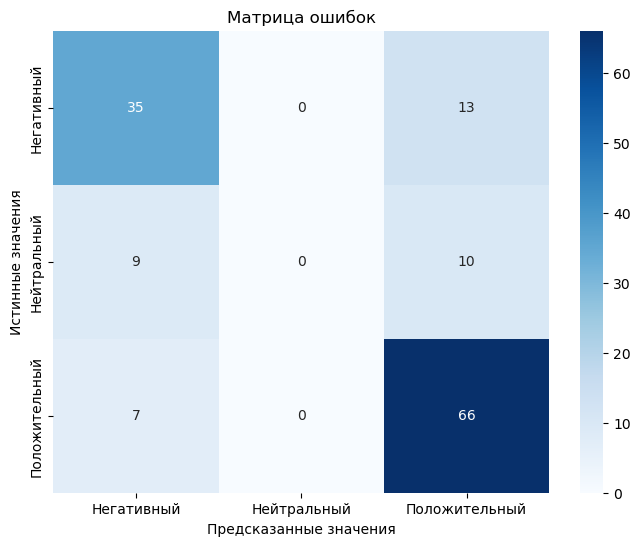

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_train_pred = sentiment_model.predict(X_train)
y_test_pred = sentiment_model.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –º–∞—Ç—Ä–∏—Ü—ã –æ—à–∏–±–æ–∫
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π', '–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã–π', '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π'], yticklabels=['–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π', '–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã–π', '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π'])
plt.xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.ylabel('–ò—Å—Ç–∏–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è')
plt.title('–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫')
plt.show()

In [89]:
metrics = {
    "Accuracy (Train)": accuracy_score(y_train, y_train_pred),
    "Accuracy (Test)": accuracy_score(y_test, y_test_pred),
    "Precision (Train)": precision_score(y_train, y_train_pred, average='weighted'),
    "Precision (Test)": precision_score(y_test, y_test_pred, average='weighted'),
    "Recall (Train)": recall_score(y_train, y_train_pred, average='weighted'),
    "Recall (Test)": recall_score(y_test, y_test_pred, average='weighted'),
    "F1 Score (Train)": f1_score(y_train, y_train_pred, average='weighted'),
    "F1 Score (Test)": f1_score(y_test, y_test_pred, average='weighted')
}
a = pd.DataFrame.from_dict(metrics, orient='index', columns=['Score'])
a

c:\Users\an23m\anaconda3\envs\app_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Score
Accuracy (Train)   0.908929
Accuracy (Test)    0.721429
Precision (Train)  0.916720
Precision (Test)   0.621971
Recall (Train)     0.908929
Recall (Test)      0.721429
F1 Score (Train)   0.895736
F1 Score (Test)    0.667292

### –ê–∫—Ç–∏–≤–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ

In [ ]:
### 

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ

In [90]:
sentiment_analyzer = SentimentAnalyzer(sentiment_model)

In [91]:
if 'sentiment' not in df.columns:
        with ThreadPoolExecutor(max_workers=10) as executor:
            sentiments = list(executor.map(sentiment_analyzer.analyze, vectorized_texts))
        df['sentiment'] = sentiments
        print("–ê–Ω–∞–ª–∏–∑ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∑–∞–≤–µ—Ä—à–µ–Ω –∏ –¥–æ–±–∞–≤–ª–µ–Ω –≤ 'sentiment'.")
        # –ï—Å–ª–∏ –Ω—É–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –Ω–∞–∑–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤ –≤–º–µ—Å—Ç–æ —á–∏—Å–ª–æ–≤—ã—Ö –º–µ—Ç–æ–∫
        df['sentiment_label'] = df['sentiment'].replace(sentiment_analyzer.mapping)

–ê–Ω–∞–ª–∏–∑ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∑–∞–≤–µ—Ä—à–µ–Ω –∏ –¥–æ–±–∞–≤–ª–µ–Ω –≤ 'sentiment'.


In [106]:
df

object_id comment_type             comment_time  \
0         1004394051  /ugc/review  2024-08-21 08:40:36.511   
1         1004394051  /ugc/review  2024-08-26 09:14:35.621   
2         1004394051  /ugc/review  2024-08-29 12:01:41.872   
3         1004394051  /ugc/review  2024-09-02 20:16:11.641   
4         1004394051  /ugc/review  2016-05-24 23:08:56.000   
...              ...          ...                      ...   
168849  245596964645  /ugc/review  2019-10-19 20:08:37.754   
168850  245596964645  /ugc/review  2019-10-20 13:57:04.892   
168851  245596964645  /ugc/review  2019-10-20 17:18:36.411   
168852  245596964645  /ugc/review  2019-10-22 13:08:08.705   
168853  245596964645  /ugc/review  2019-10-22 21:34:55.447   

                         author_id  profession_level_num  rating  \
0       6463yeagmbaugdkbp9y9ak6ckg                     3     5.0   
1       2zhrztyn3j9apk485nktey9e80                    14     4.0   
2       5p4zc3y74pk9ffcx7p071qtyf0                     7     5.0   
3       0n0nz7jbj3tmnjj40q1bhv8cqg                     6     5.0   
4       twzk2t9fk82w6pv5jcygmc6w84                     8     1.0   
...                            ...                   ...     ...   
168849  vwgntqaxahaz9y9khh7z81ux98                    27     5.0   
168850  z1ux877fph2qaj03gvmjmhjba4                    12     2.0   
168851  2je1h7qahnunwh9uz4kr8dpqwg                    16     4.0   
168852  y3k11xa99n2yjpuq7y82w856t8                    12     5.0   
168853  373k4bv60kq1rrd3ww95v7jv9g                     7     5.0   

                                             comment_text  likes_num  \
0       –ü–ª—é—Å—ã: –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –ì–æ—Ä—è—á–∏–π –∫–æ—Ñ–µ. –ù–æ...          1   
1       –ë—ã–ª –ø–∞—Ä—É —Ä–∞–∑ –∑–∞–ø—Ä–∞–≤–∫–∞ –∫–∞–∫ –∑–∞–ø—Ä–∞–≤–∫–∞ —Ç–æ–ª—å–∫–æ –Ω–µ –≤...          0   
2       –í—Å–µ–≥–¥–∞ —Ö–æ—Ä–æ—à–∏–µ –∏ –≤–µ—Å–µ–ª—ã–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏. –í–∫—É—Å–Ω—ã–µ —Ö...          0   
3                                –°–∞–º–∞—è –ª—é–±–∏–º–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞.           2   
4                                          –ù–µ—Ç –¥–∏–∑–µ–ª—è (((          4   
...                                                   ...        ...   
168849                                  –•–æ—Ä–æ—à–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞!          4   
168850                                     –¶–µ–Ω–∞ –Ω–µ —Ä–∞–¥—É–µ—Ç          3   
168851               –¢–æ–ø–ª–∏–≤–æ,  –º–∞–≥–∞–∑–∏–Ω, —Å–µ—Ä–≤–∏—Å –Ω–∞ –≤—ã—Å–æ—Ç–µ.          6   
168852                       –°–∞–º–∞—è –ø—Ä–∏–≤–µ—Ç–ª–∏–≤–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞))          3   
168853      –∑–∞–ø—Ä–∞–≤–ª—è—é—Å—å, –ø–æ—Ç–æ–º—É —á—Ç–æ –µ—Å—Ç—å –∫–∞—Ä—Ç–∞ –ª–æ—è–ª—å–Ω–æ—Å—Ç–∏          1   

        dislikes_num               date_of_pars  hist_file_load_id  \
0                  0  2024-09-22 19:11:48+00:00                  3   
1                  0  2024-09-22 19:11:48+00:00                  3   
2                  0  2024-09-22 19:11:48+00:00                  3   
3                  0  2024-09-22 19:11:48+00:00                  3   
4                  0  2024-09-22 19:11:48+00:00                  3   
...              ...                        ...                ...   
168849             0  2024-09-22 19:11:48+00:00                  3   
168850             2  2024-09-22 19:11:48+00:00                  3   
168851             1  2024-09-22 19:11:48+00:00                  3   
168852             1  2024-09-22 19:11:48+00:00                  3   
168853             2  2024-09-22 19:11:48+00:00                  3   

                                             cleaned_text  \
0       ['–ø–ª—é—Å', '–≤–µ–∂–ª–∏–≤—ã–π', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '–≥–æ—Ä—è—á–∏–π'...   
1       ['–ø–∞—Ä–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–Ω–µ', '–≤–∏–¥–Ω–æ'...   
2       ['–≤—Å–µ–≥–¥–∞', '—Ö–æ—Ä–æ—à–∏–π', '–≤–µ—Å—ë–ª—ã–π', '—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', ...   
3                        ['—Å–∞–º–∞—è', '–ª—é–±–∏–º—ã–π', '–∑–∞–ø—Ä–∞–≤–∫–∞']   
4                                       ['–Ω–µ—Ç', '–¥–∏–∑–µ–ª—å']   

In [107]:
df.columns

Index(['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'vectorized_text', 'sentiment', 'sentiment_label'],
      dtype='object')

In [109]:
df[['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'sentiment', 'sentiment_label']].to_csv('all_with_sentiment.csv', index=False)

In [99]:
df_rating_not_good = df[df['sentiment']!=2][['comment_text', 'rating','sentiment_label']]
df_rating_not_good

comment_text  rating  \
4                                          –ù–µ—Ç –¥–∏–∑–µ–ª—è (((     1.0   
5       –ì–æ—Ä—é—á–µ–µ –Ω–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ (–≥–æ–≤–æ—Ä—é –ø—Ä–æ 92–π), —Ä–∞—Å—Ö...     1.0   
6       –ù—É–∂–Ω–æ –±—ã–ª–æ –∑–∞–ø—Ä–∞–≤–∏—Ç—å—Å—è. –ù–∞—Ö–æ–¥–∏–ª—Å—è –≤–µ—Å—å –¥–µ–Ω—å –Ω–µ...     1.0   
18      –ª—é–±–ª—é –ª—É–∫–æ–π–ª, —Ç–æ–ª—å–∫–æ –Ω–∞ –ª—É–∫–æ–π–ª–µ –∏ –∑–∞–ø—Ä–∞–≤–ª—è—é—Å—å....     3.0   
21      –ú–Ω–µ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –≤–æ—Ä—É—é—Ç –Ω–∞ –æ–±—ä–µ–º–µ –∑–∞–ª–∏—Ç–æ–≥–æ –±–µ–Ω–∑...     4.0   
...                                                   ...     ...   
168835                   –ù–µ —É–¥–æ–±–Ω—ã–π –∑–∞–µ–∑–¥ –¥–ª—è –≥—Ä—É–∑–æ–≤–∏–∫–æ–≤!     3.0   
168839                      –ö–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–æ, –±–µ–∑ –æ–±–º–∞–Ω–∞.     5.0   
168840  –†–µ–¥–∫–∏–π —Å–ª—É—á–∞–π —Ç–∞–º –∑–∞–ø—Ä–∞–≤–ª—è—é—Å—å  –¢–æ–ª–∏ –ø–æ—Å–ª–µ –Ω–∏—Ö ...     4.0   
168843                                 –ù–µ —É–¥–æ–±–Ω—ã–π –ø–æ–¥—ä–µ–∑–¥     5.0   
168850                                     –¶–µ–Ω–∞ –Ω–µ —Ä–∞–¥—É–µ—Ç     2.0   

       sentiment_label  
4           –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
5           –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
6           –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
18          –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
21          –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
...                ...  
168835      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168839      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168840      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168843      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168850      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  

[46189 rows x 3 columns]

In [100]:
df_rating_not_good[df_rating_not_good['rating']>3]

comment_text  rating  \
21      –ú–Ω–µ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –≤–æ—Ä—É—é—Ç –Ω–∞ –æ–±—ä–µ–º–µ –∑–∞–ª–∏—Ç–æ–≥–æ –±–µ–Ω–∑...     4.0   
27      –ö–∞—á–µ—Å—Ç–≤–æ –±–µ–Ω–∑–∏–Ω–∞ –æ—Ü–µ–Ω–∏—Ç—å –Ω–µ –º–æ–≥—É, –Ω–æ –∑–∞–ø—Ä–∞–≤–∏–ª–∏...     5.0   
30                                        –ù–µ—É–¥–æ–±–Ω—ã–π –∑–∞–µ–∑–¥     4.0   
42      –ó–∞–ø—Ä–∞–≤–∏–ª–∞—Å—å –∑–¥–µ—Å—å, —Ç–∞–∫ –∫–∞–∫ –Ω–∞—à–∞ –∞–∑—Å –±—ã–ª–∞ –∑–∞–∫—Ä—ã...     5.0   
50      –í—Å–µ –ø–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∞–º –ª—É–∫–æ–π–ª. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è –æ—Å–æ–±–µ–Ω–Ω...     5.0   
...                                                   ...     ...   
168824                     –ü–æ—Å–ª–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –±–µ–Ω–∑–∏–Ω –Ω–µ –∞–π—Å.     5.0   
168828  –ü—Ä–æ—Å—Ç–æ –µ–∑–∂—É –º–∏–º–æ –ø–ª—é—Å –∫–æ–≥–¥–∞ —Ç–æ —É—Å–ª—ã—à–∞–ª, —á—Ç–æ —É ...     5.0   
168839                      –ö–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–æ, –±–µ–∑ –æ–±–º–∞–Ω–∞.     5.0   
168840  –†–µ–¥–∫–∏–π —Å–ª—É—á–∞–π —Ç–∞–º –∑–∞–ø—Ä–∞–≤–ª—è—é—Å—å  –¢–æ–ª–∏ –ø–æ—Å–ª–µ –Ω–∏—Ö ...     4.0   
168843                                 –ù–µ —É–¥–æ–±–Ω—ã–π –ø–æ–¥—ä–µ–∑–¥     5.0   

       sentiment_label  
21          –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
27          –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
30          –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
42          –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
50         –ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã–π  
...                ...  
168824      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168828      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168839      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168840      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  
168843      –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π  

[24551 rows x 3 columns]

### –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ SVM

In [101]:
import joblib
joblib.dump(sentiment_model, 'model\\svm_model.pkl')

['model\\svm_model.pkl']

### –ö–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞

In [102]:
combined_vectors_array = np.load("C:\\Users\\an23m\\course_work\\app\\model\\combined_vectors.npy", allow_pickle=True).item()

In [103]:
import psycopg2

conn = psycopg2.connect("dbname=azs user=postgres password=f8ysz789")
cur = conn.cursor()

themes = pd.read_sql_query("select title from testing.s_azs_categ order by title", conn)

cur.close()
conn.close()
themes

C:\Users\an23m\AppData\Local\Temp\ipykernel_17480\3073474894.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  themes = pd.read_sql_query("select title from testing.s_azs_categ order by title", conn)


title
0                    –ë–µ–Ω–∑–∏–Ω
1            –í—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è
2                       –ì–∞–∑
3                      –ö–∞—Ñ–µ
4          –ö–∞—á–µ—Å—Ç–≤–æ –±–µ–Ω–∑–∏–Ω–∞
5             –ö–∞—á–µ—Å—Ç–≤–æ –≥–∞–∑–∞
6          –ö–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–∞
7          –ö–æ–º–Ω–∞—Ç–∞ –æ–∂–∏–¥–∞–Ω–∏—è
8                   –ö–æ–º—Ñ–æ—Ä—Ç
9                      –ö–æ—Ñ–µ
10                  –ú–∞–≥–∞–∑–∏–Ω
11                    –ú–æ–π–∫–∞
12             –û–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ
13  –û–ø–ª–∞—Ç–∞ —á–µ—Ä–µ–∑ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ
14                 –ü–∞—Ä–∫–æ–≤–∫–∞
15                 –ü–µ—Ä—Å–æ–Ω–∞–ª
16               –ü–æ–ª–Ω—ã–π –±–∞–∫
17             –†–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ
18                   –†–µ–º–æ–Ω—Ç
19          –¢–æ–ø–ª–∏–≤–Ω–∞—è –∫–∞—Ä—Ç–∞
20                 –•–æ—Ç-–¥–æ–≥–∏
21                  –ß–∏—Å—Ç–æ—Ç–∞
22               –®–∏–Ω–æ–º–æ–Ω—Ç–∞–∂

In [104]:
keywords = themes['title'].tolist()
keyword_extractor = KeywordExtractor(keywords, combined_vectors_array, preprocessor, vectorizer)

start KEYWORD


c:\Users\an23m\anaconda3\envs\app_env\Lib\site-packages\gensim\models\keyedvectors.py:849: RuntimeWarning: invalid value encountered in divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


end KEYWORD
–í—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: 9.214150190353394 —Å–µ–∫—É–Ω–¥


In [110]:
if 'keywords' not in df.columns:
        with ThreadPoolExecutor(max_workers=10) as executor:
            keywords = list(executor.map(keyword_extractor.match_review_to_themes, vectorized_texts))
        df['keywords'] = keywords
        print("–í—ã–¥–µ–ª–µ–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –∑–∞–≤–µ—Ä—à–µ–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ 'keywords'.")

–í—ã–¥–µ–ª–µ–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –∑–∞–≤–µ—Ä—à–µ–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ 'keywords'.


In [130]:
df_check = df.groupby('comment_text')['sentiment'].mean()
df_check.isin([0,1,2])
invalid_values_exist = ~df_check.isin([0, 1, 2]).all()
invalid_values_exist

False

In [122]:
df[df['keywords'].str.len() > 0][['comment_text', 'rating', 'sentiment', "keywords"]]

comment_text  rating  sentiment  \
0       –ü–ª—é—Å—ã: –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –ì–æ—Ä—è—á–∏–π –∫–æ—Ñ–µ. –ù–æ...     5.0          2   
7                              –ó–∞–ø—Ä–∞–≤–∫–∞ –∑–∞–∫—Ä—ã—Ç–∞ –Ω–∞ —Ä–µ–º–æ–Ω—Ç     1.0          2   
8       –û–±–Ω–æ–≤–ª–µ–Ω–Ω–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞. –†–µ–º–æ–Ω—Ç –±—ã–ª –≤ –Ω–æ—è–±—Ä–µ. –ï—Å—Ç...     5.0          2   
14      –û—Ç–ª–∏—á–Ω–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞ –≤ —Ç–∏—Ö–æ–º –º–µ—Å—Ç–µ —Å –º–∞–≥–∞–∑–∏–Ω –∏ –∫—É...     5.0          2   
16                        –ü–æ—Å–ª–µ —Ä–µ–º–æ–Ω—Ç–∞ –≤—Å–µ –æ—Ç–ª–∏—á–Ω–æ —É –Ω–∏—Ö     5.0          2   
...                                                   ...     ...        ...   
168838          –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞ —Å —Ö–æ—Ä–æ—à–∏–º —Ç–æ–ø–ª–∏–≤–æ–º.     5.0          2   
168839                      –ö–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–æ, –±–µ–∑ –æ–±–º–∞–Ω–∞.     5.0          0   
168841                             –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ.     5.0          2   
168842  –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ.  –£–¥–æ–±–Ω–æ–µ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ, –∫–≤–∞–ª–∏—Ñ–∏—Ü–∏—Ä...     5.0          2   
168851               –¢–æ–ø–ª–∏–≤–æ,  –º–∞–≥–∞–∑–∏–Ω, —Å–µ—Ä–≤–∏—Å –Ω–∞ –≤—ã—Å–æ—Ç–µ.     4.0          2   

                                                 keywords  
0                                                  [–∫–æ—Ñ–µ]  
7                                                [—Ä–µ–º–æ–Ω—Ç]  
8                                                [—Ä–µ–º–æ–Ω—Ç]  
14                                              [–º–∞–≥–∞–∑–∏–Ω]  
16                                               [—Ä–µ–º–æ–Ω—Ç]  
...                                                   ...  
168838        [–±–µ–Ω–∑–∏–Ω, –∫–∞—á–µ—Å—Ç–≤–æ –±–µ–Ω–∑–∏–Ω, –∫–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–æ]  
168839  [–±–µ–Ω–∑–∏–Ω, –∫–∞—á–µ—Å—Ç–≤–æ –±–µ–Ω–∑–∏–Ω, –∫–∞—á–µ—Å—Ç–≤–æ –≥–∞–∑, –∫–∞—á–µ—Å—Ç...  
168841                                     [–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ]  
168842                [–∫–∞—á–µ—Å—Ç–≤–æ –±–µ–Ω–∑–∏–Ω, –∫–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–æ]  
168851       [–∫–∞—á–µ—Å—Ç–≤–æ –±–µ–Ω–∑–∏–Ω, –∫–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–æ, –º–∞–≥–∞–∑–∏–Ω]  

[54401 rows x 4 columns]

In [111]:
df.columns

Index(['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'vectorized_text', 'sentiment', 'sentiment_label', 'keywords'],
      dtype='object')

In [112]:
df[['object_id', 'comment_type', 'comment_time', 'author_id',
       'profession_level_num', 'rating', 'comment_text', 'likes_num',
       'dislikes_num', 'date_of_pars', 'hist_file_load_id', 'cleaned_text',
       'sentiment', 'sentiment_label', 'keywords']].to_csv('all_processed.csv', index=False)

–ó–∞–≥—Ä—É–∑–∫–∞ –≤ –ë–î

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168854 entries, 0 to 168853
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   object_id             168854 non-null  int64  
 1   comment_type          168854 non-null  object 
 2   comment_time          168854 non-null  object 
 3   author_id             168854 non-null  object 
 4   profession_level_num  168854 non-null  int64  
 5   rating                168711 non-null  float64
 6   comment_text          168854 non-null  object 
 7   likes_num             168854 non-null  int64  
 8   dislikes_num          168854 non-null  int64  
 9   date_of_pars          168854 non-null  object 
 10  hist_file_load_id     168854 non-null  int64  
 11  cleaned_text          168854 non-null  object 
 12  vectorized_text       168854 non-null  object 
 13  sentiment             168854 non-null  int64  
 14  sentiment_label       168854 non-null  object 
 15  

In [133]:
import hashlib
df['review_hash'] = df['comment_text'].apply(lambda x: hashlib.md5(x.encode()).hexdigest())

In [185]:
# –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏—è —Å—Ç—Ä—É–∫—Ç—É—Ä–µ —Ç–∞–±–ª–∏—Ü—ã
df_for_db = df.rename(columns={
    'comment_text': 'comment_text',
    'cleaned_text': 'clean_text',
    'sentiment': 'sentiment_score',
    'sentiment_label': 'sentiment',
    'keywords': 'keywords'
})

In [186]:
df_for_db.head(1)

object_id comment_type             comment_time  \
0  1004394051  /ugc/review  2024-08-21 08:40:36.511   

                    author_id  profession_level_num  rating  \
0  6463yeagmbaugdkbp9y9ak6ckg                     3     5.0   

                                        comment_text  likes_num  dislikes_num  \
0  –ü–ª—é—Å—ã: –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –ì–æ—Ä—è—á–∏–π –∫–æ—Ñ–µ. –ù–æ...          1             0   

                date_of_pars  hist_file_load_id  \
0  2024-09-22 19:11:48+00:00                  3   

                                          clean_text  \
0  ['–ø–ª—é—Å', '–≤–µ–∂–ª–∏–≤—ã–π', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '–≥–æ—Ä—è—á–∏–π'...   

                                     vectorized_text  sentiment_score  \
0  [[0.18638138, -0.27080196, -0.3037158, -0.1582...                2   

       sentiment keywords                       review_hash  
0  –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π   [–∫–æ—Ñ–µ]  1afdaef12fbb6d8a6d87d3f4ab84d144

In [187]:
def parse_string_to_list(string_value):
    # –ï—Å–ª–∏ –∑–Ω–∞—á–µ–Ω–∏–µ —É–∂–µ —è–≤–ª—è–µ—Ç—Å—è —Å–ø–∏—Å–∫–æ–º, –ø—Ä–æ—Å—Ç–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –µ–≥–æ
    if isinstance(string_value, list):
        return string_value
    # –ï—Å–ª–∏ —ç—Ç–æ —Å—Ç—Ä–æ–∫–∞, –ø—ã—Ç–∞–µ–º—Å—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –µ—ë –≤ —Å–ø–∏—Å–æ–∫
    elif isinstance(string_value, str):
        try:
            return ast.literal_eval(string_value) if string_value else []
        except (ValueError, SyntaxError):
            return []  # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –ø—É—Å—Ç–æ–π —Å–ø–∏—Å–æ–∫, –µ—Å–ª–∏ –Ω–µ —É–¥–∞–µ—Ç—Å—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å —Å—Ç—Ä–æ–∫—É
    return []

In [189]:
values = [(row['review_hash'], 
           row['comment_text'], 
           row['clean_text'], 
           row['sentiment'], 
           row['sentiment_score'], 
           parse_string_to_list(row['keywords'])
           ) 
          for index, row in df_for_db.iterrows()]

values

[('1afdaef12fbb6d8a6d87d3f4ab84d144',
  '–ü–ª—é—Å—ã: –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ. –ì–æ—Ä—è—á–∏–π –∫–æ—Ñ–µ. –ù–æ—Ä–º–∞–ª—å–Ω—ã–π –±–µ–Ω–∑–∏–Ω. –ò–º–µ–µ—Ç—Å—è –ø–∞—Ä–∞ –ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã—Ö –º–µ—Å—Ç, —á—Ç–æ–±—ã –≤—ã–ø–∏—Ç—å –∫–æ—Ñ–µ. ',
  "['–ø–ª—é—Å', '–≤–µ–∂–ª–∏–≤—ã–π', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '–≥–æ—Ä—è—á–∏–π', '–∫–æ—Ñ–µ', '–Ω–æ—Ä–º–∞–ª—å–Ω—ã–π', '–±–µ–Ω–∑–∏–Ω', '–∏–º–µ—Ç—å—Å—è', '–ø–∞—Ä–∞', '–ø–∞—Ä–∫–æ–≤–æ—á–Ω—ã–π', '–º–µ—Å—Ç–æ', '–≤—ã–ø–∏—Ç—å', '–∫–æ—Ñ–µ']",
  '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π',
  2,
  ['–∫–æ—Ñ–µ']),
 ('de33cd4c61989ab888f68d7662657b80',
  '–ë—ã–ª –ø–∞—Ä—É —Ä–∞–∑ –∑–∞–ø—Ä–∞–≤–∫–∞ –∫–∞–∫ –∑–∞–ø—Ä–∞–≤–∫–∞ —Ç–æ–ª—å–∫–æ –Ω–µ –≤–∏–¥–Ω–æ —Å –ø—Ä–æ–µ–∑–∂–µ–π —á–∞—Å—Ç–∏',
  "['–ø–∞—Ä–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–∑–∞–ø—Ä–∞–≤–∫–∞', '–Ω–µ', '–≤–∏–¥–Ω–æ', '–ø—Ä–æ–µ–∑–∂–∏–π', '—á–∞—Å—Ç—å']",
  '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π',
  2,
  []),
 ('1ac2105d9bd6a0f613b891bfb1300b1a',
  '–í—Å–µ–≥–¥–∞ —Ö–æ—Ä–æ—à–∏–µ –∏ –≤–µ—Å–µ–ª—ã–µ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏. –í–∫—É—Å–Ω—ã–µ —Ö–æ—Ç-–¥–æ–≥

In [194]:
values[4]

('a0969f412a403d15973bd4ce52cb5a6b',
 '–ù–µ—Ç –¥–∏–∑–µ–ª—è (((',
 "['–Ω–µ—Ç', '–¥–∏–∑–µ–ª—å']",
 '–ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π',
 0,
 [])

In [191]:
type(values[4][5])

list

In [196]:
import psycopg2

conn = psycopg2.connect("dbname=azs user=postgres password=f8ysz789")
cur = conn.cursor()

cur.execute('TRUNCATE TABLE "buffer"."azs_review_analysis" CASCADE')

insert_query = """
    INSERT INTO buffer.azs_review_analysis (
        review_hash, comment_text, clean_text, sentiment, sentiment_score, keywords
    ) VALUES (%s, %s, %s, %s, %s, %s)
"""

# –í—ã–ø–æ–ª–Ω–µ–Ω–∏–µ –≤—Å—Ç–∞–≤–∫–∏ –¥–∞–Ω–Ω—ã—Ö
cur.executemany(insert_query, values)

# –ü–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ–º —Ç—Ä–∞–Ω–∑–∞–∫—Ü–∏—é –∏ –∑–∞–∫—Ä—ã–≤–∞–µ–º —Å–æ–µ–¥–∏–Ω–µ–Ω–∏–µ
conn.commit()

cur.execute("select testing.fn_load_analyzed_reviews()")

cur.close()
conn.close()

### –ì—Ä–∞—Ñ–∏–∫–∏

In [13]:
import psycopg2
import pandas as pd
def get_analyzed_reviews(db_host, db_name, db_user, db_password):
    try:
        with psycopg2.connect(
            host=db_host,
            database=db_name,
            user=db_user,
            password=db_password
            ) as conn:
            with conn.cursor() as cur: 
                df = pd.read_sql_query("""select ai.object_id, ai.rating as azs_rating, address, region, profession_level_num, 
                                            ar.rating as review_rating, ar.comment_text, ar.comment_time, sentiment, sentiment_score, keywords, clean_text
                                            from testing.azs_info as ai 
                                            join testing.azs_review as ar 
                                            on ai.object_id = ar.object_id 
                                            left join testing.azs_review_analysis as a 
                                            on md5(ar.comment_text) = a.review_hash
                                            where ar.date_of_pars = (select max(date_of_pars) from testing.azs_review);""", conn) 
                return df
                
    except Exception as e:
        print(f"Error with connection or cursor: {e}" )
        return pd.DataFrame()

In [14]:
db_host = "localhost"
db_name = "azs"
db_user = "postgres"
db_password = "f8ysz789"

In [15]:
df = get_analyzed_reviews(db_host, db_name, db_user, db_password)

C:\Users\an23m\AppData\Local\Temp\ipykernel_9176\1175793072.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""select ai.object_id, ai.rating as azs_rating, address, region, profession_level_num,


In [16]:
df.head(2)

object_id  azs_rating                      address  region  \
0  1025894608         4.4  –ö–æ–ø—Ç–µ–≤—Å–∫–∞—è —É–ª., 69–ê, –ú–æ—Å–∫–≤–∞  –ú–æ—Å–∫–≤–∞   
1  1025894608         4.4  –ö–æ–ø—Ç–µ–≤—Å–∫–∞—è —É–ª., 69–ê, –ú–æ—Å–∫–≤–∞  –ú–æ—Å–∫–≤–∞   

   profession_level_num  review_rating  \
0                     4            1.0   
1                     9            5.0   

                                        comment_text            comment_time  \
0  –ü—Ä–∏–µ—Ö–∞–ª–∞ —É—Ç—Ä–æ–º –∑–∞ –∫–æ—Ñ–µ –∏ –∏—Å–ø–æ—Ä—Ç–∏–ª–∞ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏–µ ... 2022-03-26 11:21:38.090   
1  –í–µ–∂–ª–∏–≤–æ–µ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ! –•–æ—Ä–æ—à–∞—è –∑–∞–ø—Ä–∞–≤–∫–∞! –ï—Å—Ç—å ... 2022-05-12 11:55:19.724   

       sentiment  sentiment_score keywords  \
0     –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–π                0       []   
1  –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π                2       []   

                                          clean_text  
0  ['–ø—Ä–∏–µ—Ö–∞—Ç—å', '—É—Ç—Ä–æ', '–∫–æ—Ñ–µ', '–∏—Å–ø–æ—Ä—Ç–∏—Ç—å', '–Ω–∞—Å...  
1  ['–≤–µ–∂–ª–∏–≤—ã–π', '–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ', '—Ö–æ—Ä–æ—à–∏–π', '–∑–∞–ø—Ä–∞...

In [11]:
import matplotlib.pyplot as plt

In [24]:
positive_reviews[:1000]

'–ø—Ä–∏–µ—Ö–∞—Ç—å —É—Ç—Ä–æ –∫–æ—Ñ–µ –∏—Å–ø–æ—Ä—Ç–∏—Ç—å –Ω–∞—Å—Ç—Ä–æ–µ–Ω–∏–µ –≤–µ—Å—å –¥–µ–Ω—å –ø—Ä–∏–ø–∞—Ä–∫–æ–≤–∞—Ç—å—Å—è —Å–±–æ–∫—É –∫–æ–ª–æ–Ω–∫–∞ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å—Å—è –≤–µ—Å—å –∫–ª–∏–µ–Ω—Ç –∫–æ—Ç–æ—Ä—ã–µ –∑–∞–ø—Ä–∞–≤–∫–∞ –∫—É–ø–∏—Ç—å –∫–æ—Ñ–µ —Å–∞–¥–∏—Ç—å—Å—è –º–∞—à–∏–Ω–∞ –≤–∏–¥–µ—Ç—å –∫–∞—Ä—Ç–∏–Ω–∞ –∂–µ–Ω—â–∏–Ω–∞ –æ—Ä–µ—Ç –∑–∞–ø—Ä–∞–≤—â–∏—Ü–∞ —Å—Ç–∞–≤–∏—Ç—å –æ–≥—Ä–∞–∂–¥–µ–Ω–∏–µ –¥–∞–±—ã –∫–ª–∏–µ–Ω—Ç –Ω–µ —Å–º–æ—á—å –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞—Ç—å—Å—è –¥–∞–ª–µ–µ –∂–µ–Ω—â–∏–Ω–∞ –ø–æ–¥—Ö–æ–¥–∏—Ç—å –Ω–µ –ø–æ–∑–¥–æ—Ä–æ–≤–∞–≤—à–∏—Å—å –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å—Å—è –æ—Å—Ç–µ—Ä–≤–µ–Ω–µ–ª—ã–π –ª–∏—Ü–æ –Ω–∞—á–∞—Ç—å –≥–æ–≤–æ—Ä–∏—Ç—å —É–±—Ä–∞—Ç—å –º–∞—à–∏–Ω–∞ –∑–∞–¥–∞—Ç—å –≤–æ–ø—Ä–æ—Å —Å–∫–∞–∑–∞—Ç—å –º–µ–Ω–µ–¥–∂–µ—Ä –¥–∞–Ω–Ω–æ–≥–æ –∑–∞–≤–µ–¥–µ–Ω–∏–µ –∑–∞–¥–∞–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–π –≤–æ–ø—Ä–æ—Å –ø—Ä–∏—á–∏–Ω–∞ —Ä–∞–∑–≥–æ–≤–∞—Ä–∏–≤–∞—Ç—å —Å–æ–º —Å–≤–æ–π –∫–ª–∏–µ–Ω—Ç –æ—Ç–≤–µ—Ç–∏—Ç—å —Å–≤–æ—ë –ª–∏—Ü–æ –≤–∏–¥–µ—Ç—å –æ—Ç–≤–µ—Ç–∏—Ç—å —á—Ç–æ–æ–æ –ø—Ä–æ—Å—å–±–∞ –≤–ª–∞–¥–µ–

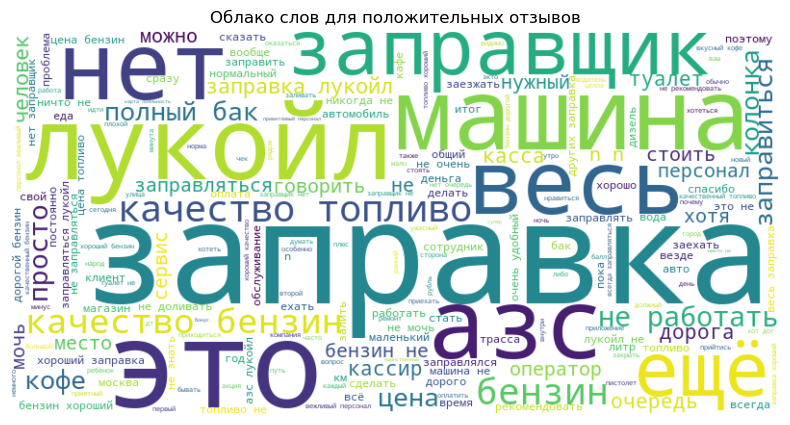

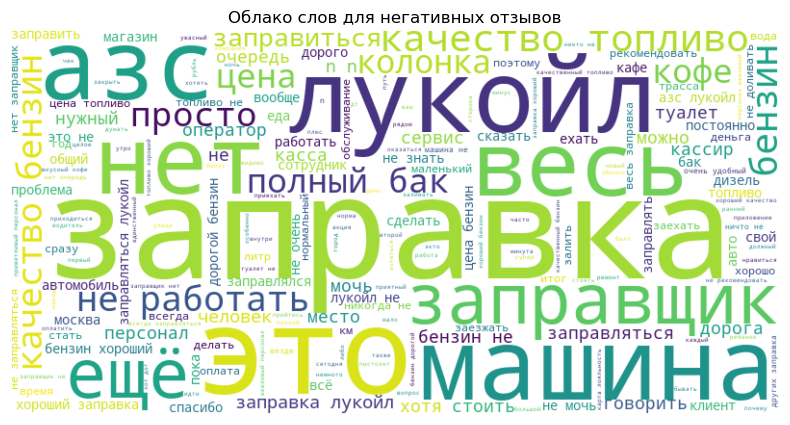

In [25]:
from wordcloud import WordCloud
# positive_reviews = ' '.join(st.session_state.reviews_df[st.session_state.reviews_df['sentiment'] == 2]['cleaned_text'])
positive_reviews = ' '.join(df[df['sentiment_score'] == 0]['clean_text']).replace('[','').replace("'",'').replace(',','').replace(']','')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –æ–±–ª–∞–∫–æ —Å–ª–æ–≤
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")
plt.show()

negative_reviews = ' '.join(df[df['sentiment_score'] == 0]['clean_text']).replace('[','').replace("'",'').replace(',','').replace(']','')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –æ–±–ª–∞–∫–æ —Å–ª–æ–≤
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –¥–ª—è –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")
plt.show()

In [27]:
import seaborn as sns

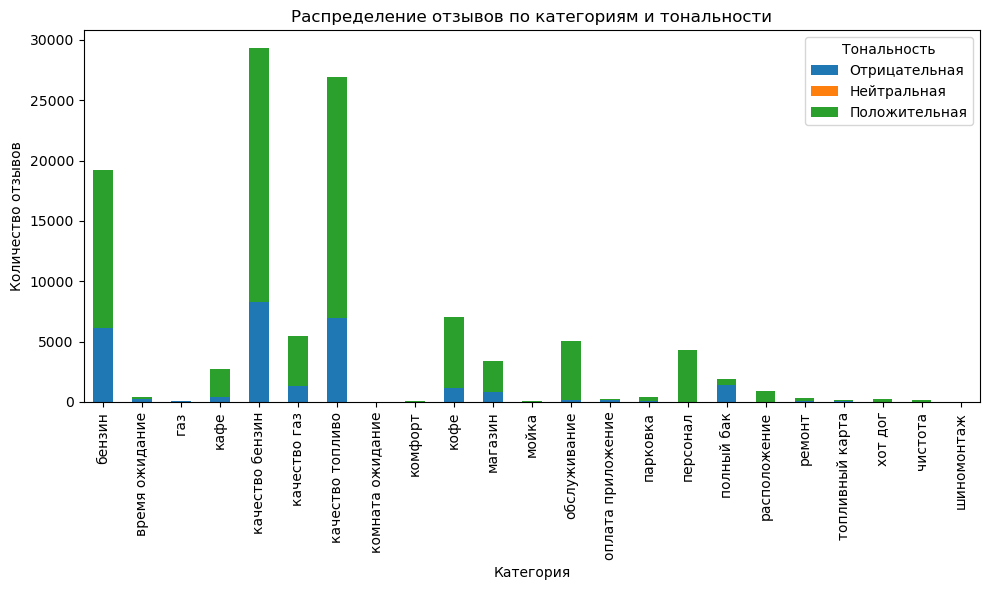

In [82]:
exploded_df = df.explode('keywords')
sentiment_distribution = exploded_df.groupby(['keywords', 'sentiment_score']).size().unstack(fill_value=0)

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è —Ñ–∏–≥—É—Ä—ã
fig, ax = plt.subplots(figsize=(10, 6))

sentiment_distribution.plot(kind='bar', stacked=True, ax=ax)  # –£–∫–∞–∑—ã–≤–∞–µ–º ax –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –Ω–∞ —Ä–∞–Ω–µ–µ —Å–æ–∑–¥–∞–Ω–Ω–æ–π —Ñ–∏–≥—É—Ä–µ
ax.set_title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –∏ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏')
ax.set_xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
ax.set_ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.legend(title='–¢–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', labels=['–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è', '–ù–µ–π—Ç—Ä–∞–ª—å–Ω–∞—è', '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è'])
plt.tight_layout()
plt.show()

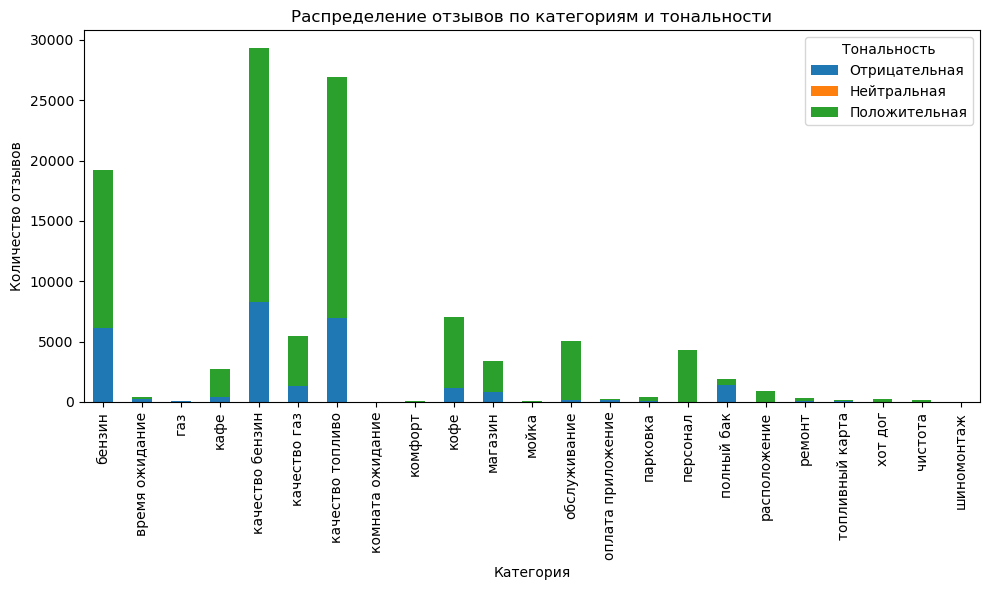

In [30]:
# –†–∞–∑–≤–æ—Ä–∞—á–∏–≤–∞–µ–º –∫–æ–ª–æ–Ω–∫—É keywords, —á—Ç–æ–±—ã –∫–∞–∂–¥–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è –±—ã–ª–∞ –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–π —Å—Ç—Ä–æ–∫–µ
exploded_df = df.explode('keywords')
sentiment_distribution = exploded_df.groupby(['keywords', 'sentiment_score']).size().unstack(fill_value=0)
# —É—á–µ—Å—Ç—å —á—Ç–æ –≤ keywords –ª–µ–∂–∏—Ç —Å–ø–∏—Å–æ–∫, –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ª–æ–≤
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –∏ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.xticks(rotation=90)
plt.legend(title='–¢–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', labels=['–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è', '–ù–µ–π—Ç—Ä–∞–ª—å–Ω–∞—è', '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è'])
plt.tight_layout()
plt.show()

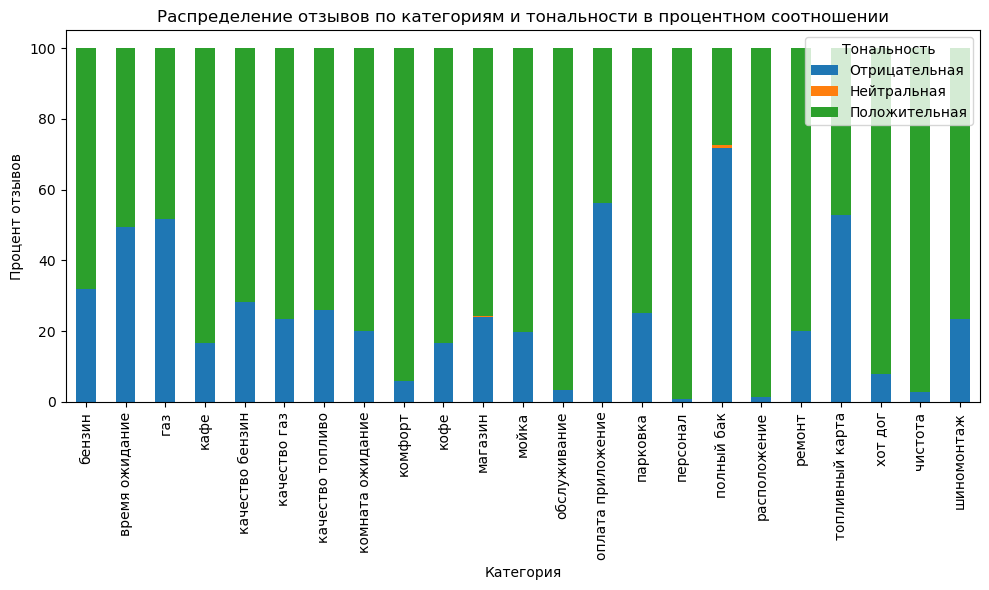

In [32]:
sentiment_distribution_percent = sentiment_distribution.div(sentiment_distribution.sum(axis=1), axis=0) * 100

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
sentiment_distribution_percent.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –∏ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–∏')
plt.xlabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–∑—ã–≤–æ–≤')
plt.xticks(rotation=90)
plt.legend(title='–¢–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', labels=['–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è', '–ù–µ–π—Ç—Ä–∞–ª—å–Ω–∞—è', '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è'])
plt.tight_layout()
plt.show()

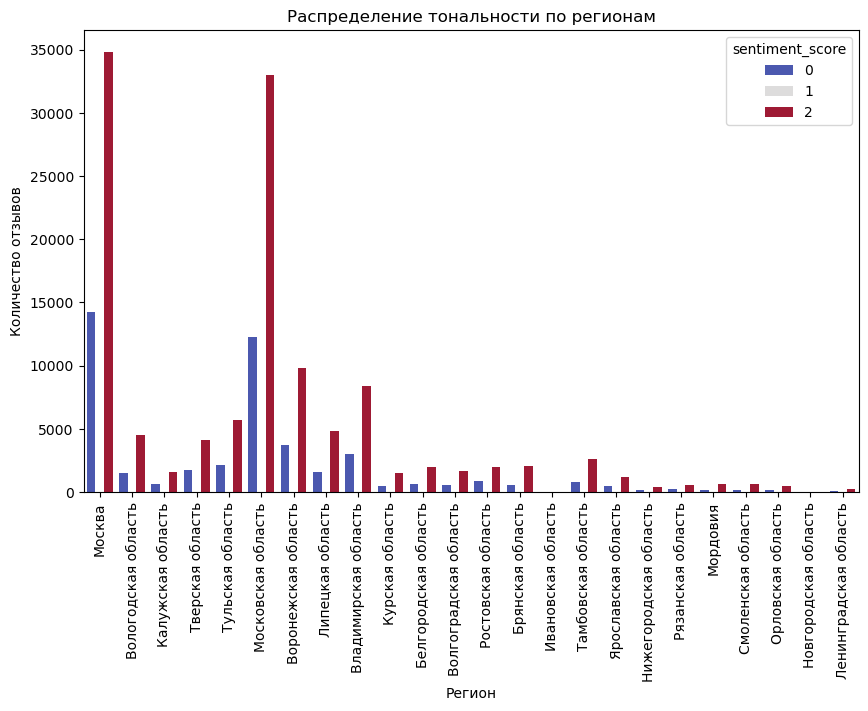

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='sentiment_score', palette='coolwarm')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º")
plt.xlabel("–†–µ–≥–∏–æ–Ω")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤")
plt.xticks(rotation=90)
plt.show()

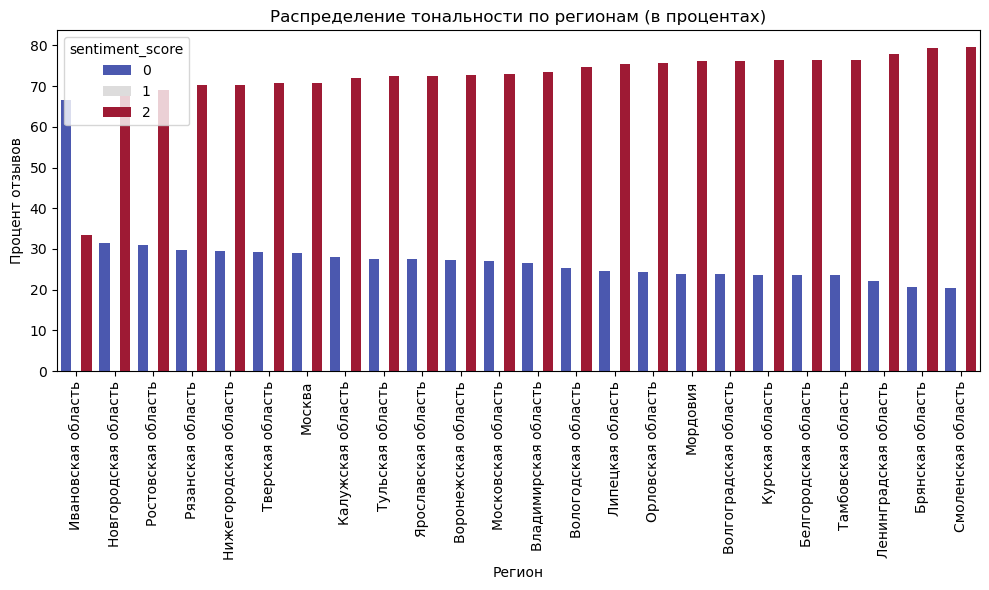

In [40]:
# –í—ã—á–∏—Å–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–∞–∂–¥–æ–º—É —Ä–µ–≥–∏–æ–Ω—É –∏ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏
region_sentiment_counts = df.groupby(['region', 'sentiment_score']).size().unstack(fill_value=0)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≥–∏–æ–Ω–∞
region_sentiment_percent = region_sentiment_counts.div(region_sentiment_counts.sum(axis=1), axis=0) * 100

# –°–æ—Ä—Ç–∏—Ä—É–µ–º —Ä–µ–≥–∏–æ–Ω—ã –ø–æ –ø—Ä–æ—Ü–µ–Ω—Ç—É –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å = 1)
region_sentiment_percent = region_sentiment_percent.sort_values(by=0, ascending=False)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∞ –≤ –Ω—É–∂–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ
region_sentiment_percent = region_sentiment_percent.reset_index().melt(id_vars='region', var_name='sentiment_score', value_name='percentage')

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å –ø—Ä–æ—Ü–µ–Ω—Ç–∞–º–∏
plt.figure(figsize=(10, 6))
sns.barplot(data=region_sentiment_percent, x='region', y='percentage', hue='sentiment_score', palette='coolwarm')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º (–≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö)")
plt.xlabel("–†–µ–≥–∏–æ–Ω")
plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–∑—ã–≤–æ–≤")
plt.xticks(rotation=90)
# plt.legend(title='–¢–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å', labels=['–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–∞—è', '–ù–µ–π—Ç—Ä–∞–ª—å–Ω–∞—è', '–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è'])
plt.tight_layout()
plt.show()

Text(0, 0.5, '–ü—Ä–æ—Ü–µ–Ω—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤')

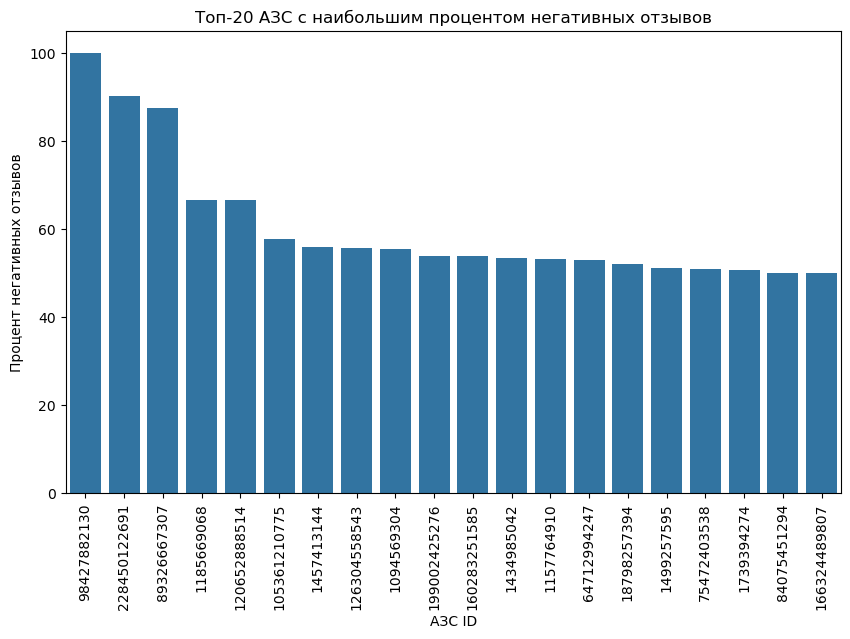

In [56]:
review_counts = df.groupby('object_id').agg(
total_reviews=('sentiment_score', 'size'),
negative_reviews=('sentiment_score', lambda x: (x == 0).sum()),
neutral_reviews=('sentiment_score', lambda x: (x == 1).sum()),
positive_reviews=('sentiment_score', lambda x: (x == 2).sum()),
).reset_index()

# –í—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–∑—ã–≤–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –ê–ó–°
review_counts['negative_ratio'] = review_counts['negative_reviews'] / review_counts['total_reviews'] * 100
review_counts['neutral_ratio'] = review_counts['neutral_reviews'] / review_counts['total_reviews'] * 100
review_counts['positive_ratio'] = review_counts['positive_reviews'] / review_counts['total_reviews'] * 100


# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –ø—Ä–æ—Ü–µ–Ω—Ç—É –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –≤ –ø–æ—Ä—è–¥–∫–µ —É–±—ã–≤–∞–Ω–∏—è
top_negative = review_counts.sort_values(by='negative_ratio', ascending=False).head(20).reset_index()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å —É–∫–∞–∑–∞–Ω–∏–µ–º –ø–æ—Ä—è–¥–∫–∞ —Å—Ç–æ–ª–±—Ü–æ–≤ –ø–æ `object_id` –∏–∑ `top_negative`
plt.figure(figsize=(10, 6))
sns.barplot(data=top_negative, x='object_id', y='negative_ratio', order=top_negative['object_id'])
plt.title("–¢–æ–ø-20 –ê–ó–° —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")
plt.xlabel("–ê–ó–° ID")
plt.xticks(rotation=90)
plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")

Text(0, 0.5, '–ü—Ä–æ—Ü–µ–Ω—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤')

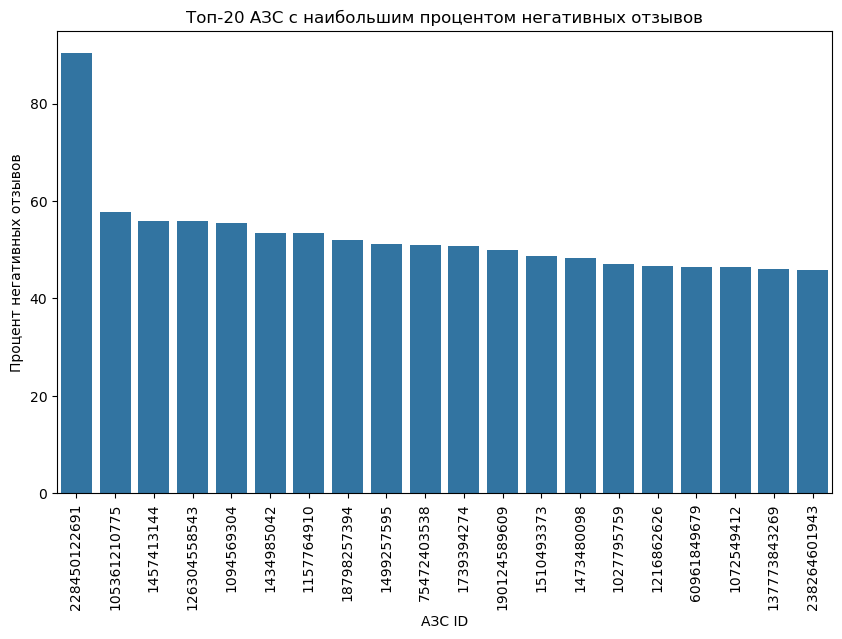

In [ ]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ object_id –∏ —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
review_counts = df.groupby('object_id').agg(
    total_reviews=('sentiment_score', 'size'),
    negative_reviews=('sentiment_score', lambda x: (x == 0).sum()),
    neutral_reviews=('sentiment_score', lambda x: (x == 1).sum()),
    positive_reviews=('sentiment_score', lambda x: (x == 2).sum()),
).reset_index()

# –§–∏–ª—å—Ç—Ä—É–µ–º —Ç–æ–ª—å–∫–æ —Ç–µ –ê–ó–°, –≥–¥–µ –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –±–æ–ª—å—à–µ –∏–ª–∏ —Ä–∞–≤–Ω–æ 20
review_counts = review_counts[review_counts['total_reviews'] >= 20]

# –í—ã—á–∏—Å–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç –æ—Ç–∑—ã–≤–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–π –ê–ó–°
review_counts['negative_ratio'] = review_counts['negative_reviews'] / review_counts['total_reviews'] * 100
review_counts['neutral_ratio'] = review_counts['neutral_reviews'] / review_counts['total_reviews'] * 100
review_counts['positive_ratio'] = review_counts['positive_reviews'] / review_counts['total_reviews'] * 100

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –ø—Ä–æ—Ü–µ–Ω—Ç—É –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –≤ –ø–æ—Ä—è–¥–∫–µ —É–±—ã–≤–∞–Ω–∏—è
top_negative = review_counts.sort_values(by='negative_ratio', ascending=False).head(20).reset_index()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å —É–∫–∞–∑–∞–Ω–∏–µ–º –ø–æ—Ä—è–¥–∫–∞ —Å—Ç–æ–ª–±—Ü–æ–≤ –ø–æ `object_id` –∏–∑ `top_negative`
plt.figure(figsize=(10, 6))
sns.barplot(data=top_negative, x='object_id', y='negative_ratio', order=top_negative['object_id'])
plt.title("–¢–æ–ø-20 –ê–ó–° —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")
plt.xlabel("–ê–ó–° ID")
plt.xticks(rotation=90)
plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤")
# –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –Ω–µ –º–µ–Ω—å—à–µ 20

In [83]:
exploded_df = df.explode('keywords')
negative_reviews = exploded_df[exploded_df['sentiment_score'] == 0]

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ 'object_id' –∏ 'keywords', —á—Ç–æ–±—ã –ø–æ—Å—á–∏—Ç–∞—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
category_counts = negative_reviews.groupby(['object_id', 'keywords']).size().unstack().fillna(0)

# # –ü–æ–ª—É—á–∞–µ–º —Ç–æ–ø-20 –ê–ó–° —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç–æ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
# top_negative = review_counts.sort_values(by='negative_ratio', ascending=False).head(20).reset_index()

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–ª—è —ç—Ç–∏—Ö —Ç–æ–ø–æ–≤—ã—Ö –ê–ó–°
# –ò—Å–ø–æ–ª—å–∑—É–µ–º 'object_id' –∏–∑ top_negative –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –≤ category_counts
top_negative_categories = category_counts.loc[category_counts.index.isin(top_negative['object_id'])]

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ
print("–ö–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –¥–ª—è —Ç–æ–ø-20 –ê–ó–°")
top_negative_categories

–ö–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –¥–ª—è —Ç–æ–ø-20 –ê–ó–°


keywords      –±–µ–Ω–∑–∏–Ω  –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏–µ  –≥–∞–∑  –∫–∞—Ñ–µ  –∫–∞—á–µ—Å—Ç–≤–æ –±–µ–Ω–∑–∏–Ω  \
object_id                                                          
1027795759      13.0             0.0  0.0   0.0             12.0   
1072549412       5.0             0.0  0.0   1.0              7.0   
1094569304      15.0             0.0  0.0   0.0             17.0   
1157764910       8.0             0.0  0.0   0.0              7.0   
1216862626       4.0             1.0  0.0   0.0              6.0   
1434985042      26.0             1.0  1.0   1.0             30.0   
1457413144       5.0             0.0  0.0   1.0              8.0   
1473480098      14.0             0.0  2.0   0.0             18.0   
1499257595      15.0             1.0  1.0   0.0             19.0   
1510493373      15.0             1.0  3.0   0.0             17.0   
1739394274       3.0             0.0  0.0   1.0              5.0   
18798257394      1.0             0.0  0.0   0.0              0.0   
60961849679     13.0             1.0  0.0   0.0             23.0   
75472403538      2.0             0.0  0.0   0.0              6.0   
105361210775     1.0             0.0  0.0   0.0              1.0   
126304558543     1.0             0.0  0.0   0.0              0.0   
137773843269    17.0             0.0  1.0   1.0             26.0   
190124589609     1.0             0.0  0.0   0.0              0.0   
228450122691     5.0             1.0  0.0   0.0              2.0   
238264601943     2.0             0.0  0.0   0.0              6.0   

keywords      –∫–∞—á–µ—Å—Ç–≤–æ –≥–∞–∑  –∫–∞—á–µ—Å—Ç–≤–æ —Ç–æ–ø–ª–∏–≤–æ  –∫–æ–º–Ω–∞—Ç–∞ –æ–∂–∏–¥–∞–Ω–∏–µ  –∫–æ–º—Ñ–æ—Ä—Ç  –∫–æ—Ñ–µ  \
object_id                                                                       
1027795759             0.0              12.0               0.0      0.0   0.0   
1072549412             1.0               5.0               0.0      0.0   0.0   
1094569304             1.0              11.0               0.0      0.0   0.0   
1157764910             0.0               3.0               0.0      0.0   0.0   
1216862626             2.0               5.0               0.0      0.0   0.0   
1434985042             8.0              24.0               0.0      0.0   4.0   
1457413144             1.0               7.0               0.0      0.0   1.0   
1473480098             6.0              18.0               0.0      0.0   2.0   
1499257595             2.0              12.0               0.0      0.0   3.0   
1510493373             8.0              16.0               0.0      0.0   0.0   
1739394274             0.0               1.0               0.0      0.0   0.0   
18798257394            0.0               0.0               0.0      0.0   1.0   
60961849679            2.0              18.0               0.0      0.0   0.0   
75472403538            0.0               4.0               0.0      0.0   0.0   
105361210775           0.0               1.0               0.0      0.0   0.0   
126304558543           0.0               0.0               0.0      0.0   4.0   
137773843269           5.0              18.0               0.0      0.0   5.0   
190124589609           0.0               0.0               0.0      0.0   0.0   
228450122691           0.0               1.0               0.0      0.0   0.0   
238264601943           1.0               5.0               0.0      0.0   0.0   

keywords      ...  –æ–ø–ª–∞—Ç–∞ –ø—Ä–∏–ª–æ–∂–µ–Ω–∏–µ  –ø–∞—Ä–∫–æ–≤–∫–∞  –ø–µ—Ä—Å–æ–Ω–∞–ª  –ø–æ–ª–Ω—ã–π –±–∞–∫  \
object_id     ...                                                      
1027795759    ...                2.0       1.0       0.0         2.0   
1072549412    ...                0.0       0.0       0.0         3.0   
1094569304    ...                0.0       0.0       0.0        14.0   
1157764910    ...                1.0       0.0       0.0         0.0   
1216862626    ...                0.0       0.0       0.0         1.0   
1434985042    ...                0.0       0.0       0.0         7.0   
1457413144 

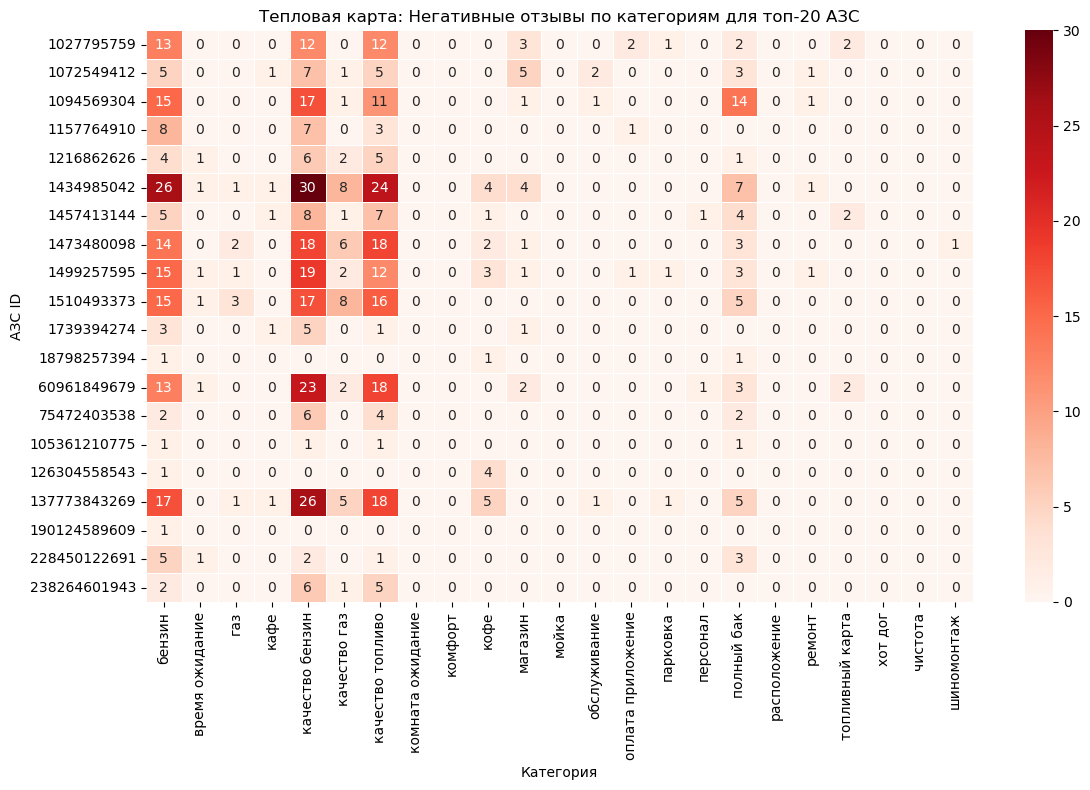

In [84]:
plt.figure(figsize=(12, 8))
sns.heatmap(top_negative_categories, annot=True, cmap='Reds', fmt='g', linewidths=0.5)
plt.title("–¢–µ–ø–ª–æ–≤–∞—è –∫–∞—Ä—Ç–∞: –ù–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –¥–ª—è —Ç–æ–ø-20 –ê–ó–°")
plt.xlabel("–ö–∞—Ç–µ–≥–æ—Ä–∏—è")
plt.ylabel("–ê–ó–° ID")
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# –ü–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–ª—è —Ç–æ–ø-20 —Å–∞–º—ã—Ö –ø–ª–æ—Ö–∏—Ö –ê–ó–°
top_negative_categories = category_counts.loc[category_counts.index.isin(top_negative_azs['object_id'])]

# –°—É–º–º–∏—Ä—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–∞–∂–¥–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –¥–ª—è —ç—Ç–∏—Ö –ê–ó–°
category_sums = top_negative_categories.sum(axis=0)

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤
sorted_categories = category_sums.sort_values(ascending=False)

# –í—ã–≤–æ–¥–∏–º –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
st.subheader("–ö–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ –¥–ª—è —Å–∞–º—ã—Ö –ø–ª–æ—Ö–∏—Ö –ê–ó–°")
st.write(sorted_categories)

—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏

In [ ]:
# –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É —Å –¥–Ω–µ–º –Ω–µ–¥–µ–ª–∏
df['day_of_week'] = df['date'].dt.day_name()

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏ –∏ —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
day_of_week_counts = df.groupby('day_of_week').size()

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –ø–æ—Ä—è–¥–∫—É –¥–Ω–µ–π –Ω–µ–¥–µ–ª–∏
day_of_week_counts = day_of_week_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='Blues')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –¥–Ω—è–º –Ω–µ–¥–µ–ª–∏')
plt.xlabel('–î–µ–Ω—å –Ω–µ–¥–µ–ª–∏')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.tight_layout()
st.pyplot(plt)


–ø–æ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫

In [ ]:
# –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É —Å —á–∞—Å–æ–º –æ—Ç–∑—ã–≤–∞
df['hour'] = df['date'].dt.hour

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ —á–∞—Å–∞–º –∏ —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
hourly_counts = df.groupby('hour').size()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='green')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫')
plt.xlabel('–ß–∞—Å')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.xticks(range(0, 24, 1))
plt.tight_layout()
st.pyplot(plt)


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º (–∞–Ω–∞–ª–∏–∑ —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏)

In [ ]:
# –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–ª–æ–Ω–∫—É —Å –º–µ—Å—è—Ü–µ–º
df['month'] = df['date'].dt.month

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –º–µ—Å—è—Ü–∞–º –∏ —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤
monthly_counts = df.groupby('month').size()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette='viridis')
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º')
plt.xlabel('–ú–µ—Å—è—Ü')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.xticks(range(12), ['–Ø–Ω–≤', '–§–µ–≤', '–ú–∞—Ä', '–ê–ø—Ä', '–ú–∞–π', '–ò—é–Ω', '–ò—é–ª', '–ê–≤–≥', '–°–µ–Ω', '–û–∫—Ç', '–ù–æ—è', '–î–µ–∫'])
plt.tight_layout()
st.pyplot(plt)


–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤–æ–≤ –¥–ª—è —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∫–ª—é—á–µ–≤—ã—Ö —Å–ª–æ–≤ –ø–æ –≤—Ä–µ–º–µ–Ω–∏

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ –∫–ª—é—á–µ–≤–æ–º—É —Å–ª–æ–≤—É, —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏
keyword_sentiment_hour_counts = exploded_df.groupby(['hour', 'keywords', 'sentiment_score']).size().unstack(fill_value=0)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(14, 8))
keyword_sentiment_hour_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='coolwarm')
plt.title('–¢–æ–Ω–∞–ª—å–Ω–æ—Å—Ç—å –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∫–ª—é—á–µ–≤—ã–º —Å–ª–æ–≤–∞–º –∏ –≤—Ä–µ–º–µ–Ω–∏ —Å—É—Ç–æ–∫')
plt.xlabel('–ß–∞—Å –¥–Ω—è')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.xticks(range(0, 24, 1))
plt.tight_layout()
st.pyplot(plt)


–≠–∫—Å–ø–æ—Ä—Ç –≤ –ø–¥—Ñ

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from io import BytesIO

In [70]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from datetime import datetime
# –°–æ–∑–¥–∞–Ω–∏–µ –∏–º–µ–Ω–∏ —Ñ–∞–π–ª–∞ —Å –º–µ—Ç–∫–æ–π –≤—Ä–µ–º–µ–Ω–∏
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
pdf_filename = f"review_report_{timestamp}.pdf"
pdf = PdfPages(pdf_filename)